<a href="https://colab.research.google.com/github/mesogin/TIS2/blob/main/4_1%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#로지스틱 회귀

## 럭키백(🛄)의 확률

**(Task)** **생선의 길이, 높이, 두께, 대각선의 길이, 무게 정보**가 주어졌을 때, 럭키백에 들어간 **7개 각 생선에 대한 확률을 출력**해야 함

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()


In [ ]:
display(fish)

In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [21]:
#돌발퀴즈
#주어진 7개 생선의 각각의 샘플 개수가 몇 개 인가요?
print(fish['Species'].value_counts())

#생선의 종류 개수
print(len(pd.unique(fish['Species'])))

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64
7


In [22]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [23]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [24]:
fish_target = fish['Species'].to_numpy()

In [25]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


현재 우리는 타깃 데이터에 2개 이상의 클래스가 포함된 문제, 즉 다중 분류(multi-class classification) 문제를 풀고 있음

(Quiz) 클래스가 2개인 문제를 무엇이라고 불렀나요?
답 : 이진분류 (binary classification_report)

In [30]:
#타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벲 순으로 매겨짐
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [31]:
# 처음 5개 샘플의 타깃값을 예측

print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [32]:
# 처음 5개 샘플에 대한 확률을 출력

import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수점 네 번째 자리까지 표기(다섯 번째 자리에서 반올림)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [35]:
# 네 번째 샘플의 최근접 이웃 클래스를 확인

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


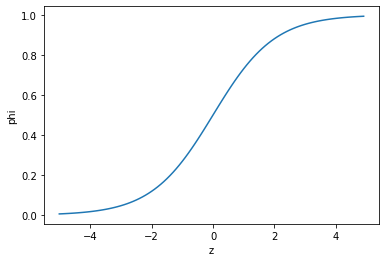

In [36]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1) # -5와 5 사이에 0.1 간격으로 배열 z를 만듦
phi = 1 / (1 + np.exp(-z)) # 지수함수 계산

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [95]:
#Bream과 Smelt 값인경우 True 아니면 False 출력
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

#True인 경우 scaled 적용해서 저장하기
train_bream_smelt = train_scaled[bream_smelt_indexes]
#True인 경우 타겟값 뽑아오기
target_bream_smelt = train_target[bream_smelt_indexes]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [40]:
# 처음 5개 샘플을 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [41]:
# 5개 샘플의 예측 확률을 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [42]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [43]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [103]:
test_target

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike', 'Bream', 'Whitefish', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Whitefish',
       'Smelt', 'Smelt', 'Pike', 'Perch', 'Perch', 'Pike', 'Bream',
       'Perch', 'Roach', 'Roach', 'Parkki', 'Perch'], dtype=object)

In [48]:
# (연습문제) 다른 생선 2종류에 대해 이진 분류를 수행해 보라.
# perch, roach 이진분류
#테스트 세트 기준 5개 샘플의 예측값과 예측 확률을 출력하시오
two_indexes = (train_target == 'Perch') | (train_target == 'Roach')
train_Perch_Roach = (train_scaled[two_indexes])
target_Perch_Roach = (train_target[two_indexes])

In [84]:
print(len())

119


In [49]:
#교육시키기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_Perch_Roach, target_Perch_Roach)

LogisticRegression()

In [76]:
#예측 값
print(lr.predict(train_Perch_Roach[:20]))

#예측 확률
lr.predict_proba(train_Perch_Roach[:20])

['Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Roach' 'Perch' 'Perch'
 'Perch' 'Perch']


array([[0.69417687, 0.30582313],
       [0.56024999, 0.43975001],
       [0.64605142, 0.35394858],
       [0.6168541 , 0.3831459 ],
       [0.6031518 , 0.3968482 ],
       [0.91931018, 0.08068982],
       [0.85955332, 0.14044668],
       [0.96760789, 0.03239211],
       [0.96885626, 0.03114374],
       [0.59286577, 0.40713423],
       [0.7493458 , 0.2506542 ],
       [0.66823886, 0.33176114],
       [0.88062416, 0.11937584],
       [0.60743653, 0.39256347],
       [0.6658551 , 0.3341449 ],
       [0.47914807, 0.52085193],
       [0.95592225, 0.04407775],
       [0.91508693, 0.08491307],
       [0.57984822, 0.42015178],
       [0.61013599, 0.38986401]])